Clonando o repositório



*   Aumentar os vizinhos a serem analisados
*   Distribuir o peso (aumentar ou diminuir de uma leaf)
*   Algoritmo usado no KNN



In [ ]:
!git clone https://github.com/higorslva/animals-dataset.git

Cloning into 'animals-dataset'...
remote: Enumerating objects: 5492, done.
remote: Total 5492 (delta 0), reused 0 (delta 0), pack-reused 5492
Receiving objects: 100% (5492/5492), 655.24 MiB | 22.24 MiB/s, done.
Updating files: 100% (5400/5400), done.


In [ ]:
!ls animals-dataset/dataset

antelope     cockroach	elephant     hippopotamus  lobster    parrot	      seahorse	turtle
badger	     cow	flamingo     hornbill	   mosquito   pelecaniformes  seal	whale
bat	     coyote	fly	     horse	   moth       penguin	      shark	wolf
bear	     crab	fox	     hummingbird   mouse      pig	      sheep	wombat
bee	     crow	goat	     hyena	   octopus    pigeon	      snake	woodpecker
beetle	     deer	goldfish     jellyfish	   okapi      porcupine       sparrow	zebra
bison	     dog	goose	     kangaroo	   orangutan  possum	      squid
boar	     dolphin	gorilla      koala	   otter      raccoon	      squirrel
butterfly    donkey	grasshopper  ladybugs	   owl	      rat	      starfish
cat	     dragonfly	hamster      leopard	   ox	      reindeer	      swan
caterpillar  duck	hare	     lion	   oyster     rhinoceros      tiger
chimpanzee   eagle	hedgehog     lizard	   panda      sandpiper       turkey


## Importando bibliotecas

In [ ]:
import os  # Importa o módulo os para interagir com o sistema operacional, permitindo manipulação de diretórios, arquivos, etc.
import cv2  # Importa o módulo cv2, que fornece funções para processamento de imagens e visão computacional usando a biblioteca OpenCV.
import numpy as np  # Importa o módulo numpy, que é uma biblioteca para computação numérica eficiente em Python.
from sklearn.model_selection import train_test_split  # Importa a função train_test_split do scikit-learn para dividir o conjunto de dados em conjuntos de treinamento e teste.
from sklearn.neighbors import KNeighborsClassifier  # Importa a classe KNeighborsClassifier do scikit-learn, que implementa o algoritmo KNN para classificação.
from sklearn.metrics import accuracy_score, confusion_matrix  # Importa funções para calcular a precisão e matriz de confusão do modelo.
import matplotlib.pyplot as plt  # Importa o módulo pyplot da biblioteca matplotlib para criação de gráficos e visualizações.
import seaborn as sns  # Importa a biblioteca seaborn para visualizações estatísticas mais atraentes e informativas.
import requests  # Importa o módulo requests para fazer solicitações HTTP.
from PIL import Image  # Importa a classe Image do módulo PIL (Python Imaging Library) para manipulação de imagens.
from io import BytesIO  # Importa a classe BytesIO do módulo io para operações de I/O de bytes em memória.


### Carregando as imagens

In [ ]:
data_path = '/content/animals-dataset/dataset'
classes = os.listdir(data_path)
images_list = []
labels_list = []

In [ ]:
import os
import cv2
import numpy as np

images = []  # Inicialize como uma lista vazia
labels = []  # Inicialize como uma lista vazia

for class_name in classes:
    class_path = os.path.join(data_path, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Adicione verificações para garantir que a imagem seja carregada corretamente
        try:
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Garante que a imagem está no formato correto
                img = cv2.resize(img, (150, 150))# Redimensiona a imagem para um tamanho fixo
                images.append(img)
                labels.append(classes.index(class_name))
            else:
                print(f"Erro ao carregar a imagem: {img_path}")

        except Exception as e:
            print(f"Erro ao processar a imagem: {img_path}")
            print(str(e))

# Converta as listas em arrays NumPy
images = np.array(images)
labels = np.array(labels)


## Pré-processamento das imagens:

Normalizando os valores dos pixels e dividindo os dados em conjuntos de treinamento e teste.

## Realizar previsões

### Realizar previsões com imagens do dataset

In [ ]:
images = []  # Inicialize como uma lista vazia
labels = []  # Inicialize como uma lista vazia


# Carregar imagens e labels
for class_name in classes:
    class_path = os.path.join(data_path, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (150, 150))
                images.append(img)
                labels.append(classes.index(class_name))
            else:
                print(f"Erro ao carregar a imagem: {img_path}")

        except Exception as e:
            print(f"Erro ao processar a imagem: {img_path}")
            print(str(e))

# Converta as listas em arrays NumPy
images = np.array(images)
labels = np.array(labels)

# Aplane as imagens para um vetor unidimensional
images_flat = images.reshape((len(images), -1))

# Inicialize e treine o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(images_flat, labels)

# Exemplo de imagens para prever
sample_images = ['/content/animals-dataset/dataset/zebra/10e8a5d5fd.jpg',
                 '/content/animals-dataset/dataset/cockroach/0661c8f342.jpg']

# Carregue e pré-processe as imagens de exemplo
sample_images_data = []
for img_path in sample_images:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    sample_images_data.append(img)

# Converta a lista de imagens em um array NumPy
sample_images_data = np.array(sample_images_data)

# Aplane as imagens para um vetor unidimensional
sample_images_flat = sample_images_data.reshape((len(sample_images_data), -1))

# Faça previsões usando o modelo k-NN
predictions = knn.predict(sample_images_flat)

# Exiba as previsões
print("\nPrevisões para as imagens de exemplo:")
for img_path, prediction in zip(sample_images, predictions):
    print(f"Imagem: {img_path} - Classe predita: {classes[prediction]}")



Previsões para as imagens de exemplo:
Imagem: /content/animals-dataset/dataset/zebra/10e8a5d5fd.jpg - Classe predita: squid
Imagem: /content/animals-dataset/dataset/cockroach/0661c8f342.jpg - Classe predita: cockroach


### Classes treinadas

In [ ]:
images = []  # Inicialize como uma lista vazia
labels = []  # Inicialize como uma lista vazia

# Carregar imagens e labels
for class_name in classes:
    class_path = os.path.join(data_path, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (150, 150))
                images.append(img.flatten())  # Aplana a imagem antes de adicioná-la à lista
                labels.append(classes.index(class_name))
            else:
                print(f"Erro ao carregar a imagem: {img_path}")

        except Exception as e:
            print(f"Erro ao processar a imagem: {img_path}")
            print(str(e))

# Converta as listas em arrays NumPy
images = np.array(images)
labels = np.array(labels)

# Inicialize e treine o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(images, labels)
print("Classes treinadas pelo modelo:")
print(classes)

Classes treinadas pelo modelo:
['bison', 'turkey', 'cat', 'seahorse', 'raccoon', 'ladybugs', 'octopus', 'antelope', 'fly', 'okapi', 'bee', 'rat', 'pigeon', 'coyote', 'rhinoceros', 'hamster', 'turtle', 'dog', 'moth', 'caterpillar', 'lizard', 'squid', 'sparrow', 'crow', 'boar', 'pig', 'orangutan', 'wolf', 'bat', 'hedgehog', 'crab', 'leopard', 'wombat', 'goldfish', 'lion', 'dolphin', 'koala', 'fox', 'parrot', 'hare', 'tiger', 'gorilla', 'jellyfish', 'snake', 'cow', 'mosquito', 'butterfly', 'seal', 'cockroach', 'sheep', 'goose', 'hummingbird', 'hornbill', 'flamingo', 'owl', 'porcupine', 'penguin', 'starfish', 'panda', 'bear', 'lobster', 'eagle', 'donkey', 'ox', 'whale', 'mouse', 'kangaroo', 'goat', 'chimpanzee', 'reindeer', 'horse', 'shark', 'duck', 'oyster', 'swan', 'woodpecker', 'sandpiper', 'hippopotamus', 'pelecaniformes', 'badger', 'squirrel', 'zebra', 'deer', 'hyena', 'grasshopper', 'elephant', 'otter', 'dragonfly', 'beetle', 'possum']


### Matriz de confusão

Acurácia do modelo no conjunto de teste: 0.07
Classes treinadas pelo modelo:
['bison', 'turkey', 'cat', 'seahorse', 'raccoon', 'ladybugs', 'octopus', 'antelope', 'fly', 'okapi', 'bee', 'rat', 'pigeon', 'coyote', 'rhinoceros', 'hamster', 'turtle', 'dog', 'moth', 'caterpillar', 'lizard', 'squid', 'sparrow', 'crow', 'boar', 'pig', 'orangutan', 'wolf', 'bat', 'hedgehog', 'crab', 'leopard', 'wombat', 'goldfish', 'lion', 'dolphin', 'koala', 'fox', 'parrot', 'hare', 'tiger', 'gorilla', 'jellyfish', 'snake', 'cow', 'mosquito', 'butterfly', 'seal', 'cockroach', 'sheep', 'goose', 'hummingbird', 'hornbill', 'flamingo', 'owl', 'porcupine', 'penguin', 'starfish', 'panda', 'bear', 'lobster', 'eagle', 'donkey', 'ox', 'whale', 'mouse', 'kangaroo', 'goat', 'chimpanzee', 'reindeer', 'horse', 'shark', 'duck', 'oyster', 'swan', 'woodpecker', 'sandpiper', 'hippopotamus', 'pelecaniformes', 'badger', 'squirrel', 'zebra', 'deer', 'hyena', 'grasshopper', 'elephant', 'otter', 'dragonfly', 'beetle', 'possum']


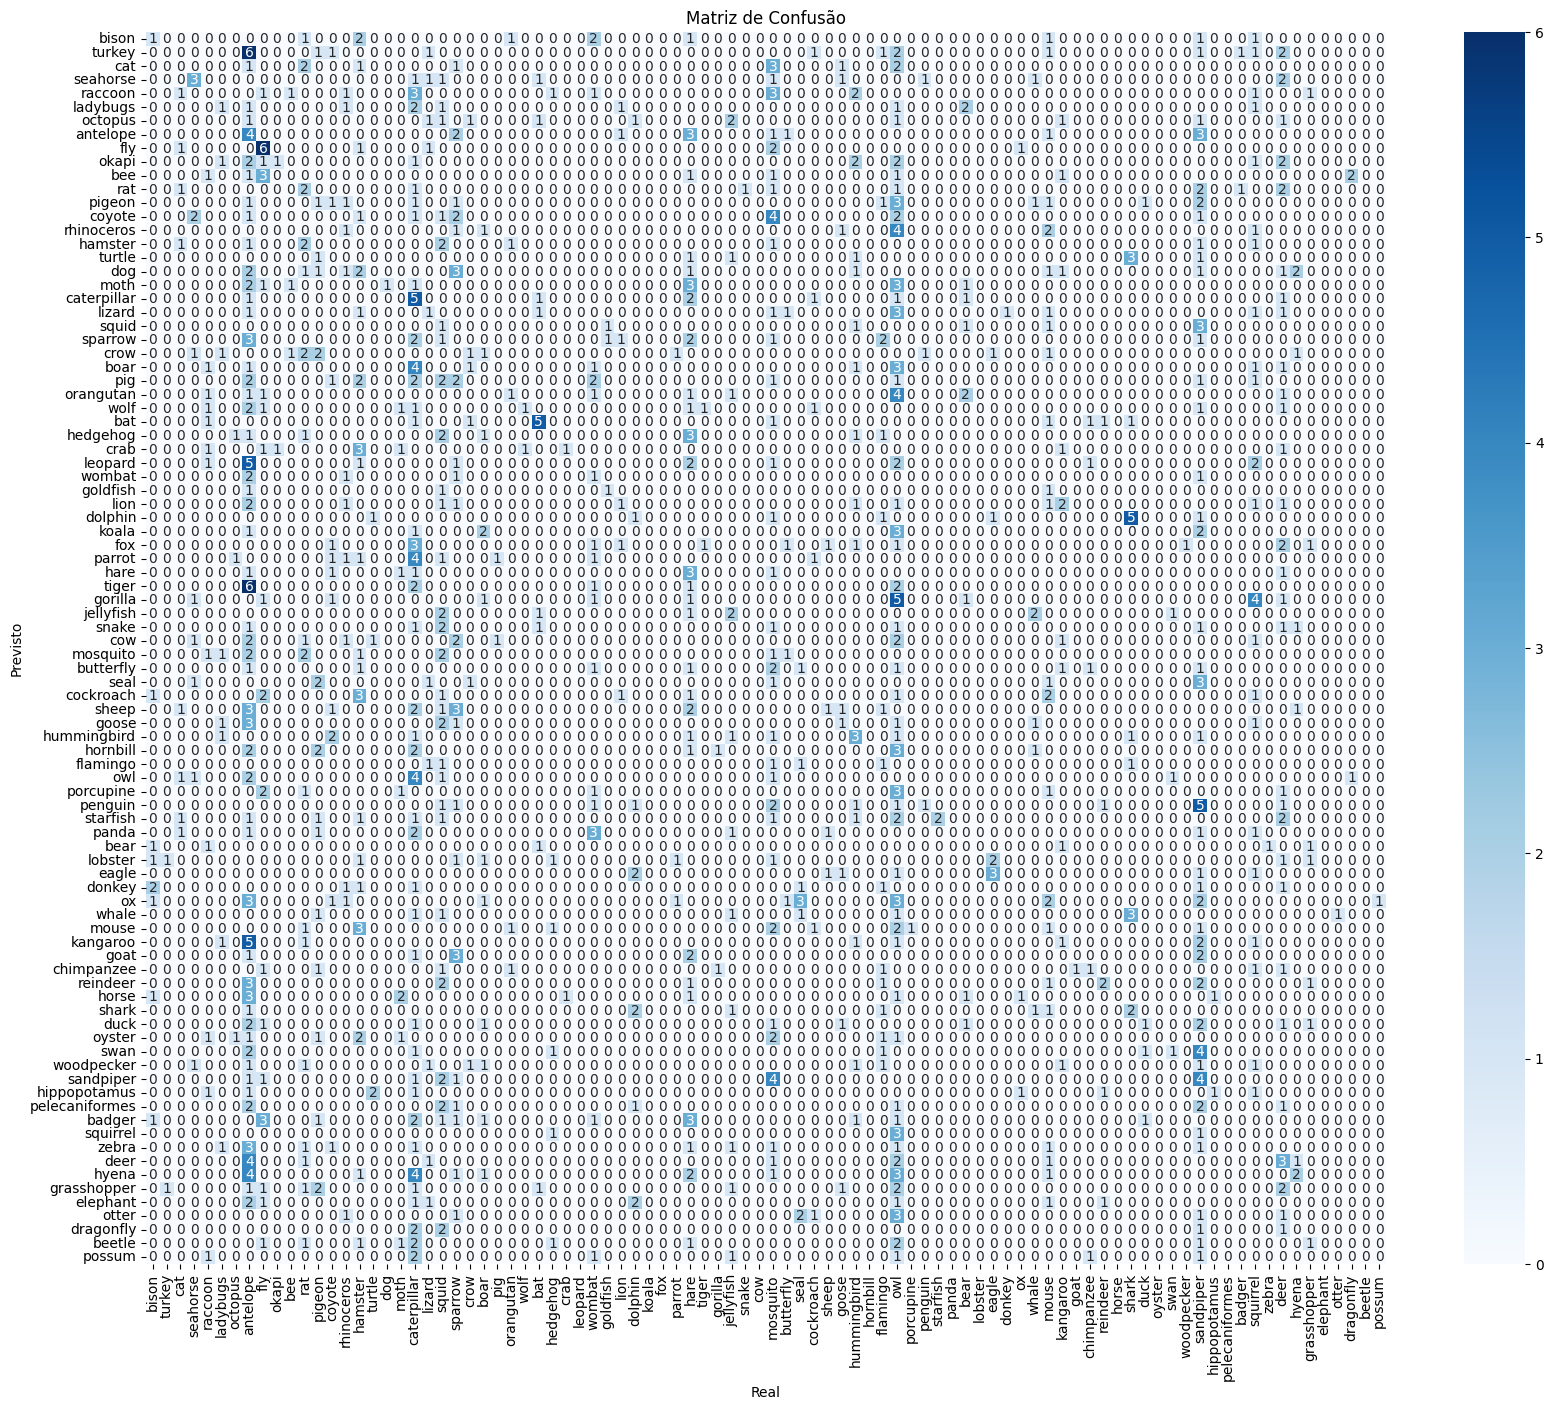

In [ ]:
images = []  # Inicialize como uma lista vazia
labels = []  # Inicialize como uma lista vazia

# Carregar imagens e labels
for class_name in classes:
    class_path = os.path.join(data_path, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (150, 150))
                images.append(img)
                labels.append(classes.index(class_name))
            else:
                print(f"Erro ao carregar a imagem: {img_path}")

        except Exception as e:
            print(f"Erro ao processar a imagem: {img_path}")
            print(str(e))

# Converta as listas em arrays NumPy
images = np.array(images)
labels = np.array(labels)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Aplane as imagens para um vetor unidimensional
X_train_flat = X_train.reshape((len(X_train), -1))
X_test_flat = X_test.reshape((len(X_test), -1))

# Inicialize e treine o modelo k-NN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_flat, y_train)

# Faça previsões no conjunto de teste
y_pred = knn.predict(X_test_flat)

# Calcule a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')

print("Classes treinadas pelo modelo:")
print(classes)
# Calcule e plote a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.show()


### Previsão usando imagem da internet


In [ ]:
# URL da imagem da web
image_url = 'https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg'

# Carregue a imagem da web
response = requests.get(image_url)
img_web = Image.open(BytesIO(response.content))
img_web = cv2.cvtColor(np.array(img_web), cv2.COLOR_RGB2BGR)  # Converta para o formato BGR

# Pré-processamento da imagem da web
img_web = cv2.resize(img_web, (150, 150))  # Redimensione para o mesmo tamanho usado no treinamento
img_web_flat = img_web.flatten()  # Aplaine para um vetor unidimensional

# Faça a previsão usando o modelo k-NN
prediction = knn.predict(img_web_flat.reshape(1, -1))  # Redimensione para 2D (uma amostra, vários recursos)

# Exiba a previsão
print(f"Classe prevista: {classes[prediction[0]]}")


Classe prevista: coyote


# TESTES #


### A versão abaixo tá com 28% de precisão, enquanto o anterior estava com 7%

23 de Fev, 23:58 - Aumentou para 29%

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import requests
from PIL import Image
from io import BytesIO

# Função para pré-processamento avançado das imagens
def preprocess_image(img):
    # Equalizar histograma em cada canal de cor separadamente
    img_r, img_g, img_b = cv2.split(img)
    img_r_eq = cv2.equalizeHist(img_r)
    img_g_eq = cv2.equalizeHist(img_g)
    img_b_eq = cv2.equalizeHist(img_b)
    # Mesclar os canais novamente
    img_eq = cv2.merge((img_r_eq, img_g_eq, img_b_eq))
    return img_eq


# Função para carregar imagens e labels com pré-processamento avançado
def load_images_advanced(data_path, classes):
    images = []
    labels = []

    for class_name in classes:
        class_path = os.path.join(data_path, class_name)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            try:
                img = cv2.imread(img_path)

                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (150, 150))
                    img = preprocess_image(img)  # Aplicar pré-processamento avançado
                    images.append(img.flatten())
                    labels.append(classes.index(class_name))
                else:
                    print(f"Erro ao carregar a imagem: {img_path}")

            except Exception as e:
                print(f"Erro ao processar a imagem: {img_path}")
                print(str(e))

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# URL do dataset de animais
dataset_url = 'https://github.com/higorslva/animals-dataset/archive/refs/heads/main.zip'
# Nome do diretório do dataset
data_dir = 'animals-dataset-main'

# Baixar e extrair o dataset
import zipfile
import urllib.request

if not os.path.exists(data_dir):
    print("Baixando o dataset...")
    urllib.request.urlretrieve(dataset_url, 'animals-dataset.zip')
    with zipfile.ZipFile('animals-dataset.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    os.remove('animals-dataset.zip')
    print("Dataset baixado e extraído com sucesso!")
else:
    print("O dataset já existe, pulando o download.")

# Caminho para o diretório com o dataset
data_path = os.path.join(data_dir, 'dataset')
# Lista de classes (nomes das pastas no diretório do dataset)
classes = os.listdir(data_path)

# Carregar imagens e labels com pré-processamento avançado
images, labels = load_images_advanced(data_path, classes)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo KNN com hiperparâmetros ajustados
knn = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='manhattan')  # Ajustando hiperparâmetros
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo no conjunto de teste: {accuracy:.2f}')

# URL da imagem de teste da web
image_url = 'https://maceioalgovbr.dhost.cloud/uploads/imagens/01-10-21-Animais-para-Adocao-Zoonoses-SMS-Gabriel-Moreira-SECOM-31.jpg'

# Carregar a imagem da web e fazer a previsão
response = requests.get(image_url)
img_web = Image.open(BytesIO(response.content))
img_web = cv2.cvtColor(np.array(img_web), cv2.COLOR_RGB2BGR)  # Converta para o formato BGR
img_web = cv2.resize(img_web, (150, 150))  # Redimensione para o mesmo tamanho usado no treinamento
img_web = preprocess_image(img_web)  # Aplicar pré-processamento avançado
img_web_flat = img_web.flatten()  # Aplaine para um vetor unidimensional

# Faça a previsão usando o modelo KNN
prediction = knn.predict(img_web_flat.reshape(1, -1))  # Redimensione para 2D (uma amostra, vários recursos)

# Exiba a previsão
print(f"Classe prevista: {classes[prediction[0]]}")

O dataset já existe, pulando o download.
Acurácia do modelo no conjunto de teste: 0.29
Classe prevista: fly


### Matriz de Confusão

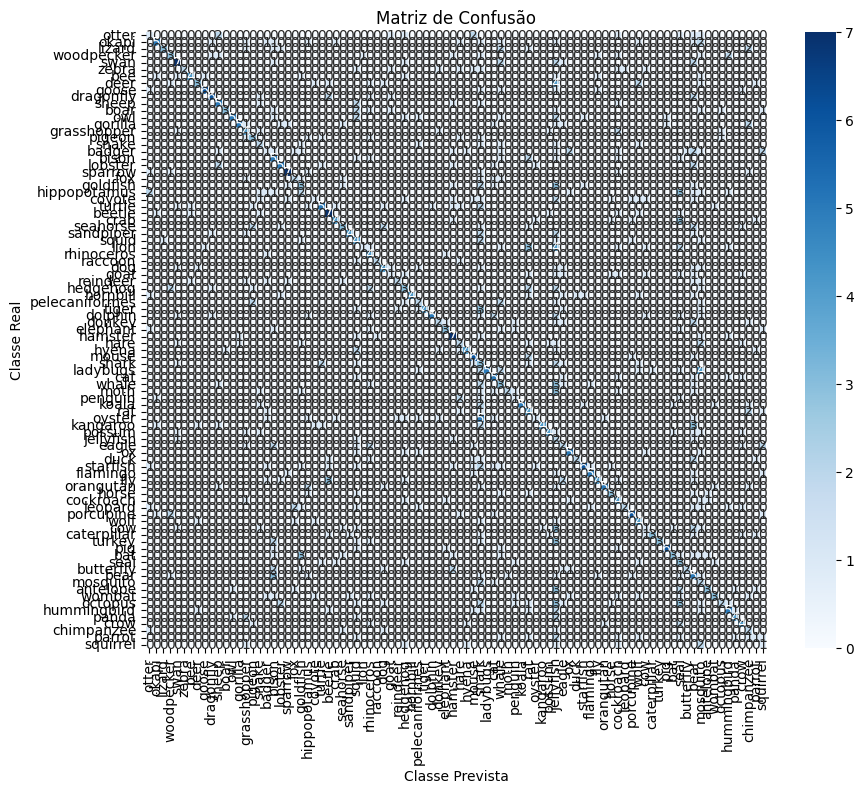

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()


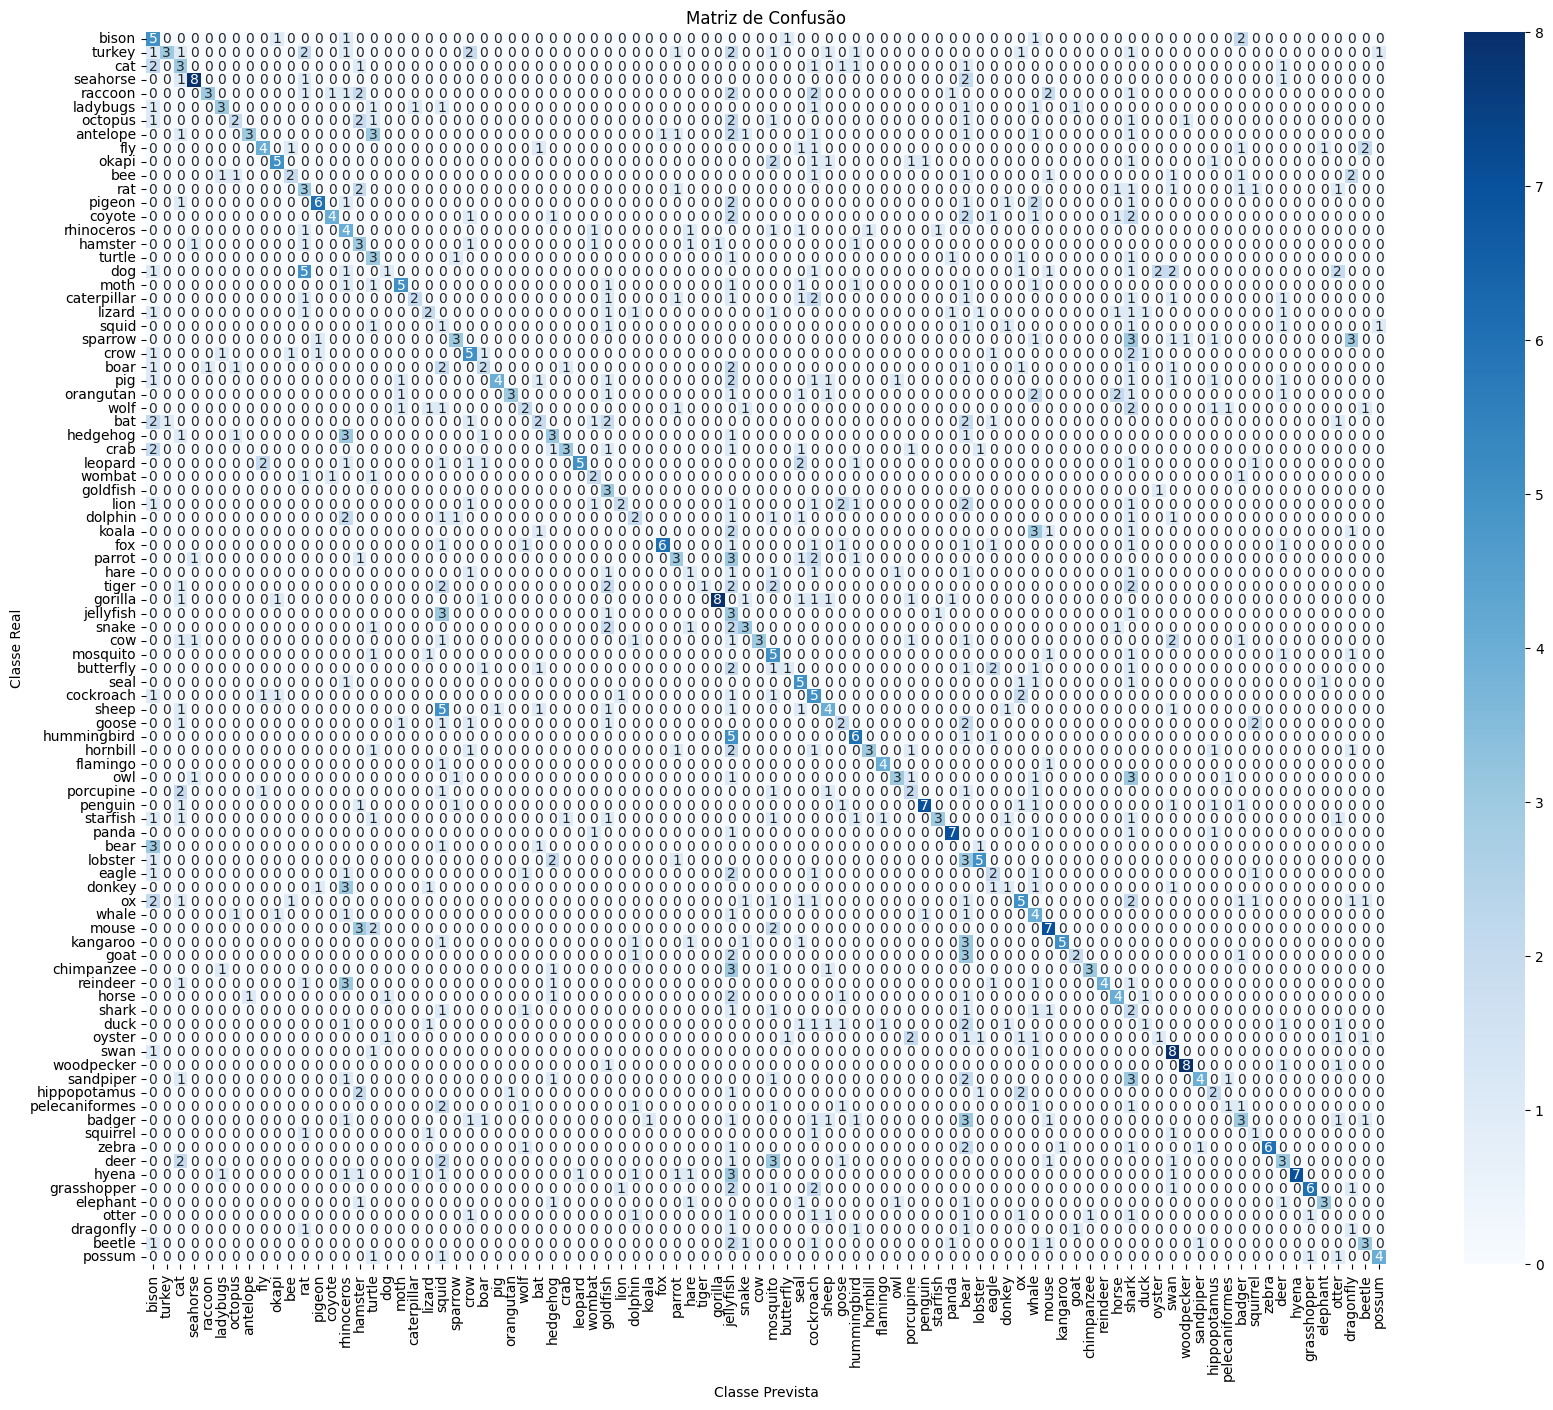

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()